In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tensorflow.keras.regularizers import l2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.activations import swish  # Ensure 'swish' activation is available
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy import stats
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import shap

# Display all columns
pd.set_option('display.max_columns', None)
# Display all rows (if needed)
pd.set_option('display.max_rows', None)
# Adjust the display width to automatically fit the content

c:\Users\Malte\projects\cropRecommendation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
df = pd.read_csv('Crop_recommendation.csv')

# Display the first 5 rows
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [18]:
# One-hot encode the 'label' column
df_encoded = pd.get_dummies(df, columns=['label'])

x_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
y_columns = [col for col in df_encoded.columns if 'label' in col]

# Display the first 5 rows of the encoded dataframe
print(df_encoded.head())

print(df_encoded.describe())

    N   P   K  temperature   humidity        ph    rainfall  label_apple  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536        False   
1  85  58  41    21.770462  80.319644  7.038096  226.655537        False   
2  60  55  44    23.004459  82.320763  7.840207  263.964248        False   
3  74  35  40    26.491096  80.158363  6.980401  242.864034        False   
4  78  42  42    20.130175  81.604873  7.628473  262.717340        False   

   label_banana  label_blackgram  label_chickpea  label_coconut  label_coffee  \
0         False            False           False          False         False   
1         False            False           False          False         False   
2         False            False           False          False         False   
3         False            False           False          False         False   
4         False            False           False          False         False   

   label_cotton  label_grapes  label_jute  label_kidneyb


Feature Descriptions:
N: Ratio of Nitrogen content in soil
P: Ratio of Phosphorous content in soil
K: Ratio of Potassium content in soil
temperature: Temperature in degree Celsius
humidity: Relative humidity in %
ph: pH value of the soil
rainfall: Rainfall in mm

Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   N                  2200 non-null   int64  
 1   P                  2200 non-null   int64  
 2   K                  2200 non-null   int64  
 3   temperature        2200 non-null   float64
 4   humidity           2200 non-null   float64
 5   ph                 2200 non-null   float64
 6   rainfall           2200 non-null   float64
 7   label_apple        2200 non-null   bool   
 8   label_banana       2200 non-null   bool   
 9   label_blackgram    2200 non-null   bool   
 10  label_chickpea     2200 non

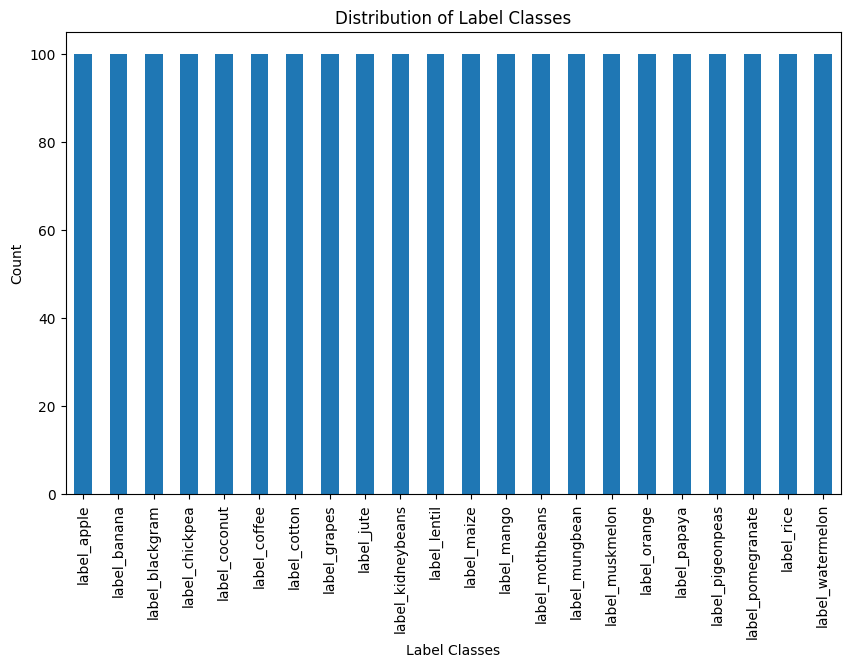


Correlation Matrix:
                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


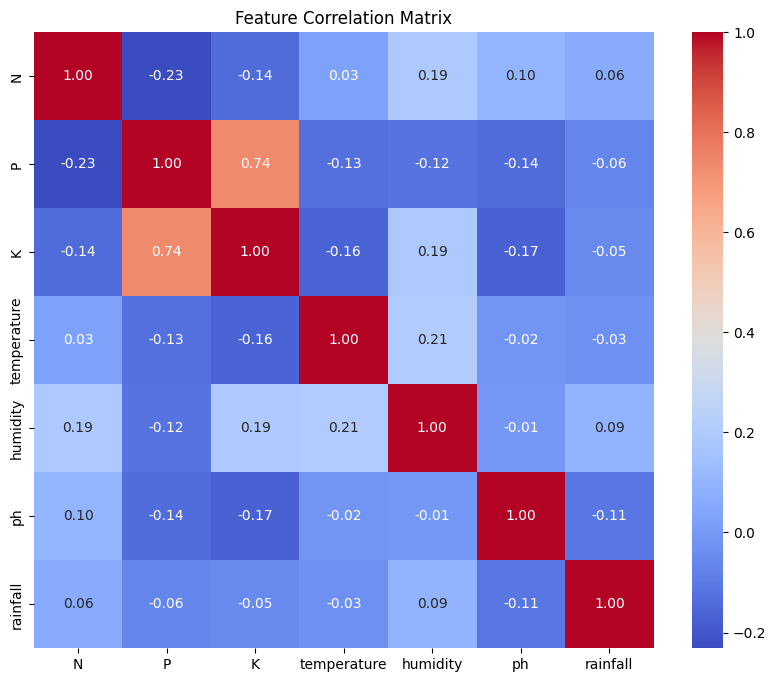

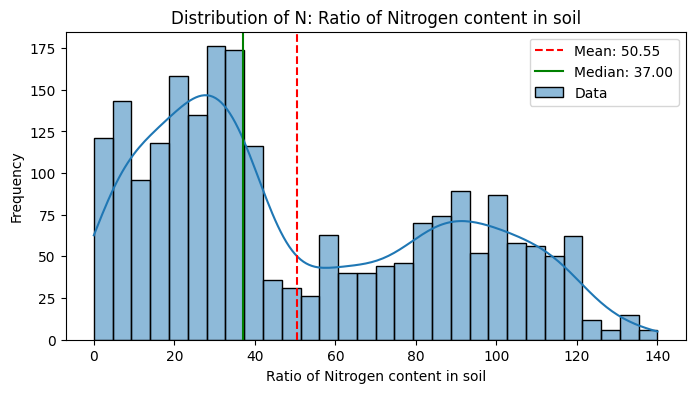

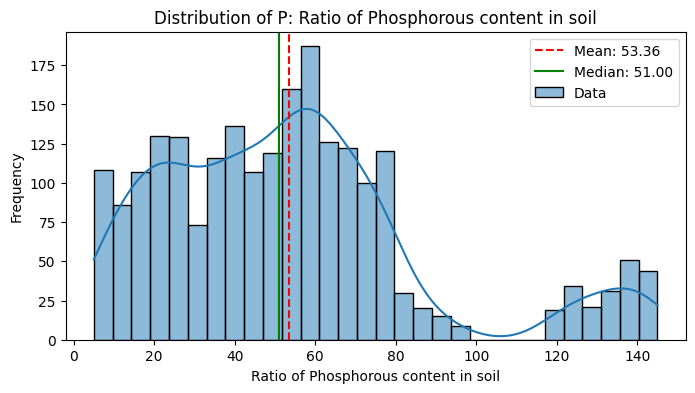

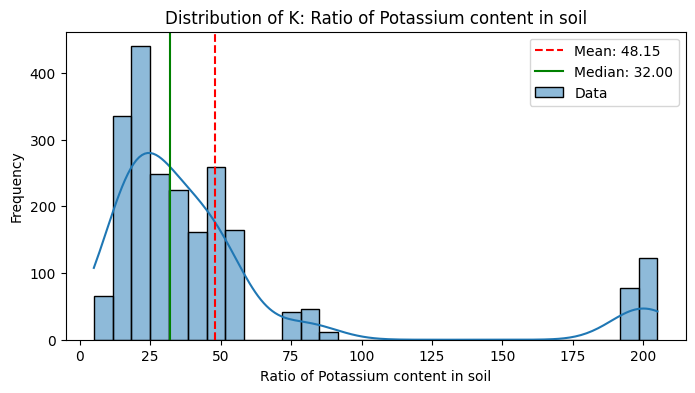

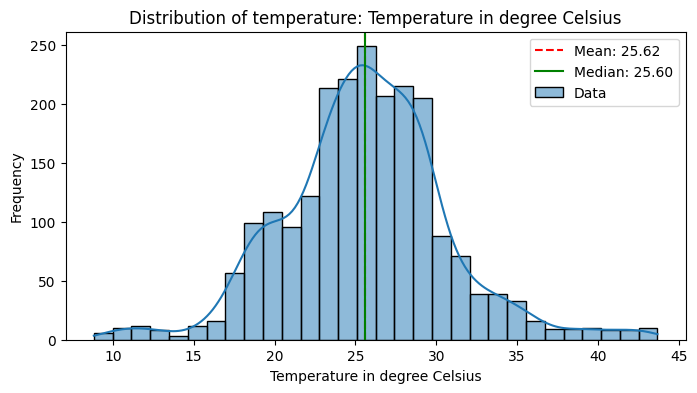

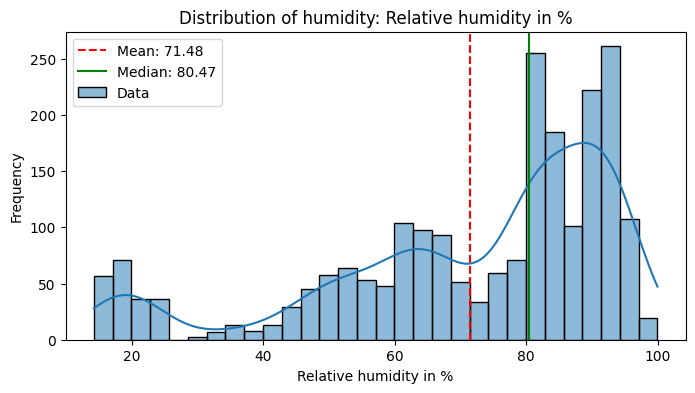

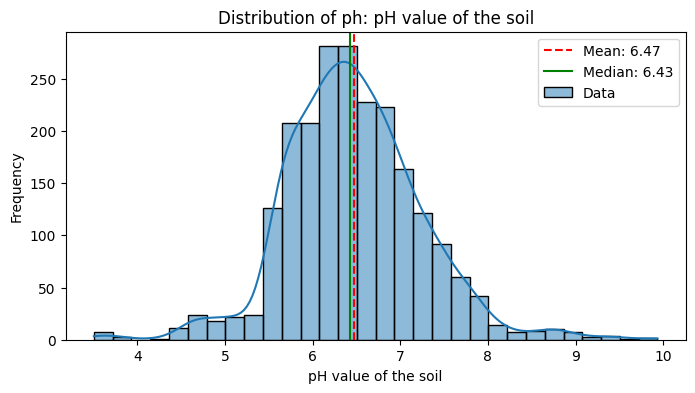

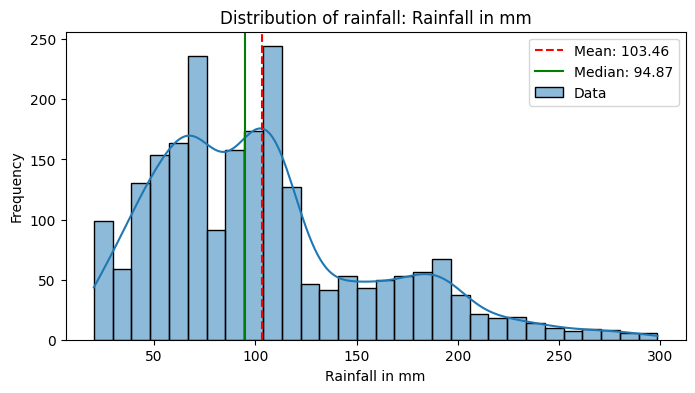

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature description dictionary
feature_info = {
    "N": "Ratio of Nitrogen content in soil",
    "P": "Ratio of Phosphorous content in soil",
    "K": "Ratio of Potassium content in soil",
    "temperature": "Temperature in degree Celsius",
    "humidity": "Relative humidity in %",
    "ph": "pH value of the soil",
    "rainfall": "Rainfall in mm",
}

# Display feature descriptions
print("\nFeature Descriptions:")
for feature, description in feature_info.items():
    print(f"{feature}: {description}")

# Basic dataset info
print("\nBasic Dataset Info:")
print(df_encoded.info())  # Check the data types and non-null counts

# Display the first few rows
print("\nFirst 5 Rows of the Dataset:")
print(df_encoded.head())

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df_encoded.describe())

# Check for missing values
print("\nMissing Values:")
missing_values = df_encoded.isnull().sum()
print(missing_values[missing_values > 0])

# Visualize the distribution of the label classes
label_columns = [col for col in df_encoded.columns if 'label_' in col]
label_counts = df_encoded[label_columns].sum()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title("Distribution of Label Classes")
plt.xlabel("Label Classes")
plt.ylabel("Count")
plt.show()

# Correlation matrix for feature columns
feature_columns = list(feature_info.keys())
correlation_matrix = df_encoded[feature_columns].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# Add annotations to histograms
for column in feature_columns:
    mean = df_encoded[column].mean()
    median = df_encoded[column].median()
    std_dev = df_encoded[column].std()

    plt.figure(figsize=(8, 4))
    sns.histplot(df_encoded[column], kde=True, bins=30, label="Data")
    plt.axvline(mean, color='r', linestyle='--', label=f"Mean: {mean:.2f}")
    plt.axvline(median, color='g', linestyle='-', label=f"Median: {median:.2f}")
    plt.title(f"Distribution of {column}: {feature_info[column]}")
    plt.xlabel(feature_info[column])
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


Epoch 1/50


c:\Users\Malte\projects\cropRecommendation\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0613 - loss: 3.1271 - val_accuracy: 0.2898 - val_loss: 2.7987
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3167 - loss: 2.6929 - val_accuracy: 0.4801 - val_loss: 2.3028
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4963 - loss: 2.1738 - val_accuracy: 0.5966 - val_loss: 1.6882
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5867 - loss: 1.5659 - val_accuracy: 0.7443 - val_loss: 1.1426
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7514 - loss: 1.0547 - val_accuracy: 0.8068 - val_loss: 0.7883
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8035 - loss: 0.7756 - val_accuracy: 0.8381 - val_loss: 0.6001
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.6254 - val_accuracy: 0.9091 - val_loss: 0.4793
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8813 - loss: 0.4841 - val_accuracy: 0.9091 - val_loss: 0.4080
Epo

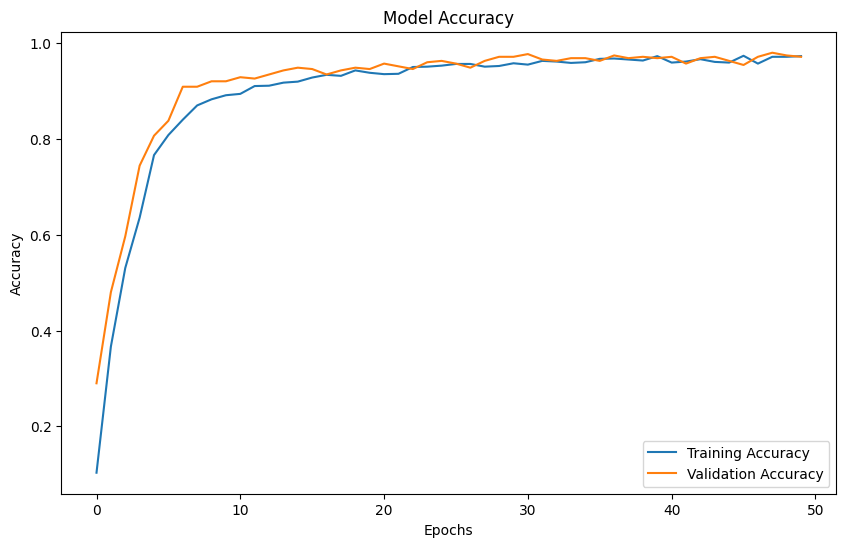

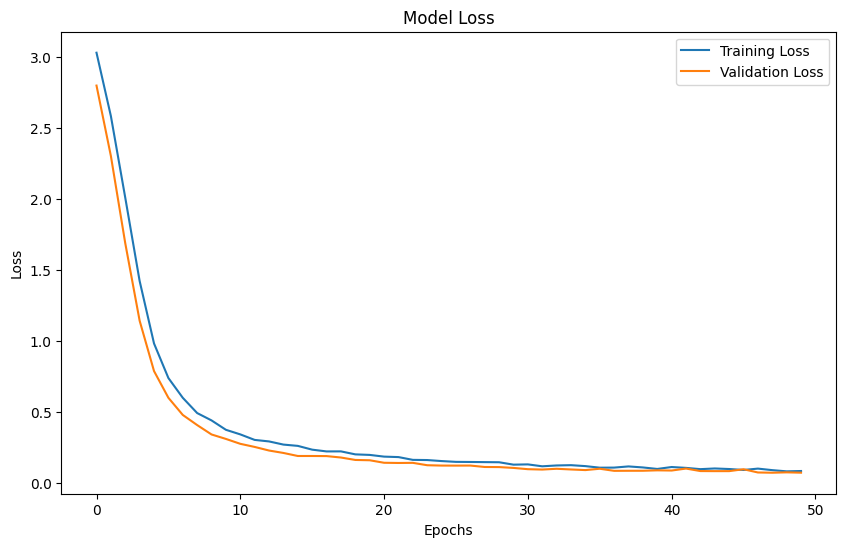

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (Y)
X = df_encoded[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values
Y = df_encoded[[col for col in df_encoded.columns if 'label_' in col]].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Prevent overfitting
    Dense(32, activation='relu'),
    Dense(Y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.81      0.74      0.77        23
           9       0.90      0.95      0.93        20
          10       0.73      1.00      0.85        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16     

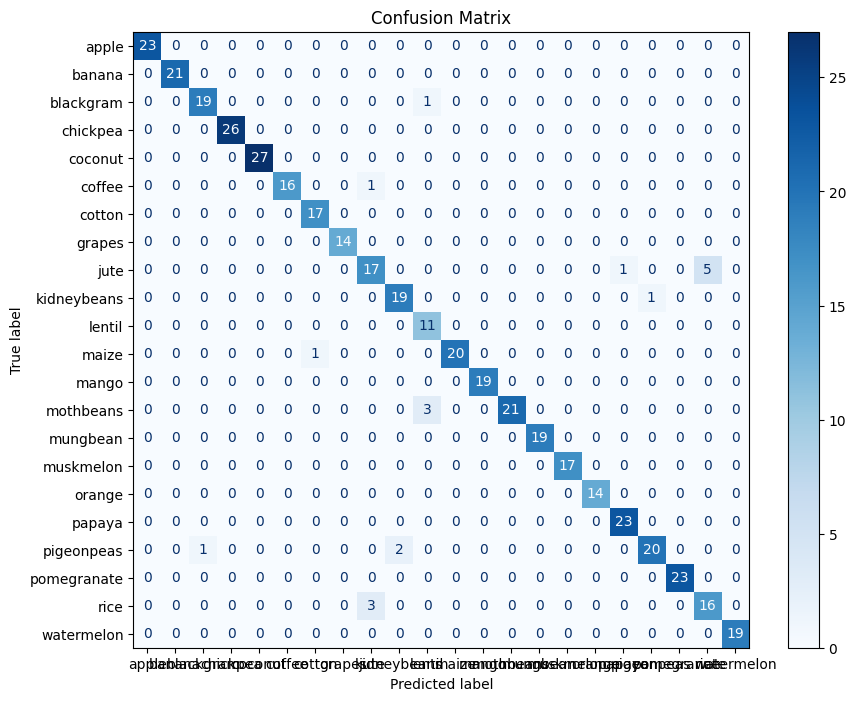


Number of Incorrect Predictions: 19
First 5 Incorrect Predictions (True Label -> Predicted Label):
Sample 31: mothbeans -> lentil
Sample 59: blackgram -> lentil
Sample 65: pigeonpeas -> blackgram
Sample 72: jute -> rice
Sample 82: rice -> jute


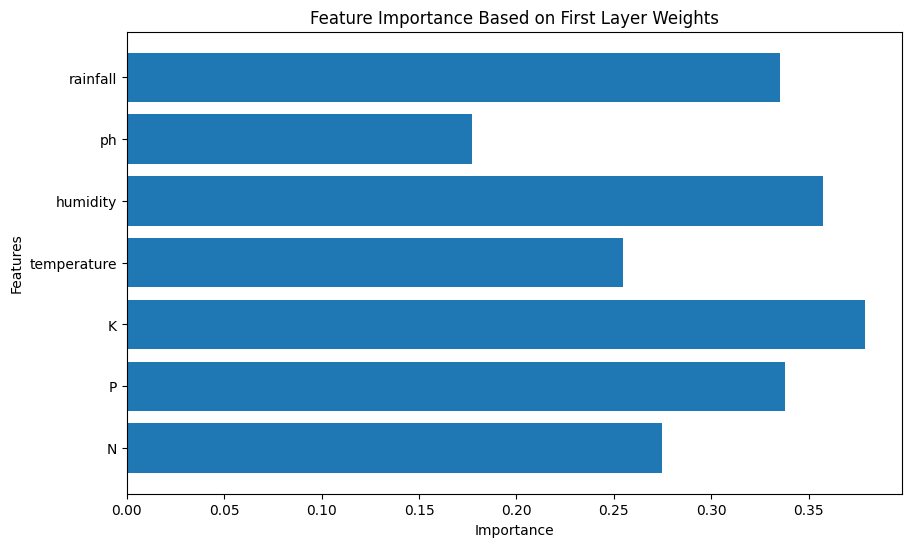

In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict the classes on the test set
Y_pred = model.predict(X_test)

# Convert predictions and true values to class indices
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_true_classes, Y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(Y_true_classes, Y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                              display_labels=[col.replace('label_', '') for col in df_encoded.columns if 'label_' in col])
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()

# Analyze incorrect predictions
incorrect_indices = np.where(Y_true_classes != Y_pred_classes)[0]
print(f"\nNumber of Incorrect Predictions: {len(incorrect_indices)}")
if len(incorrect_indices) > 0:
    print(f"First 5 Incorrect Predictions (True Label -> Predicted Label):")
    for i in incorrect_indices[:5]:
        true_label = [col.replace('label_', '') for col in df_encoded.columns if 'label_' in col][Y_true_classes[i]]
        predicted_label = [col.replace('label_', '') for col in df_encoded.columns if 'label_' in col][Y_pred_classes[i]]
        print(f"Sample {i}: {true_label} -> {predicted_label}")

# Visualize the feature importance by inspecting the first dense layer weights
first_layer_weights = model.layers[0].get_weights()[0]
feature_importance = np.mean(np.abs(first_layer_weights), axis=1)

# Plot feature importance
feature_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(10, 6))
plt.barh(feature_columns, feature_importance)
plt.title("Feature Importance Based on First Layer Weights")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
